In [1]:
#@title Imports and function definitions

import imageio
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import time

try:
  from google.colab import files
except ImportError:
  pass

from IPython import display
#from skimage import transform

# We could retrieve this value from module.get_input_shapes() if we didn't know
# beforehand which module we will be using.
latent_dim = 512


# Interpolates between two vectors that are non-zero and don't both lie on a
# line going through origin. First normalizes v2 to have the same norm as v1. 
# Then interpolates between the two vectors on the hypersphere.
def interpolate_hypersphere(v1, v2, num_steps):
  v1_norm = tf.norm(v1)
  v2_norm = tf.norm(v2)
  v2_normalized = v2 * (v1_norm / v2_norm)

  vectors = []
  for step in range(num_steps):
    interpolated = v1 + (v2_normalized - v1) * step / (num_steps - 1)
    interpolated_norm = tf.norm(interpolated)
    interpolated_normalized = interpolated * (v1_norm / interpolated_norm)
    vectors.append(interpolated_normalized)
  return tf.stack(vectors)


# Given a set of images, show an animation.
def animate(images):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images)
  with open('./animation.gif','rb') as f:
      display.display(display.Image(data=f.read(), height=300))


# Simple way to display an image.
def display_image(image):
  plt.figure()
  plt.axis("off")
  plt.imshow(image)



/Users/gexinyue/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
W0414 16:00:58.085083 4544988608 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [2]:
generate = hub.Module("https://tfhub.dev/google/progan-128/1")

In [10]:
from HilbertExplorer import HilbertExplorer

N = 512
l = 1

hilbert_curve = HilbertExplorer(N,l)

p = 2
t = 0

hilbert_curve.setP(p)
hilbert_curve.setT(t)

v = 2 ** 550
coordList = []
distList = []

#for i in range(2**(N*p-4)-1):
for i in range(2**6-1):
    curCoord = hilbert_curve.getCoordFromDist(hilbert_curve.dist)
    distList.append(hilbert_curve.dist)
    coordList.append(curCoord)
    hilbert_curve.updateDist(v)
    #print(len(coordList))

coordList = np.array(coordList)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


In [11]:
images = generate(coordList)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0414 16:02:43.586992 4544988608 tf_logging.py:115] Saver not created because there are no variables in the graph to restore


In [12]:
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    images = session.run(images)

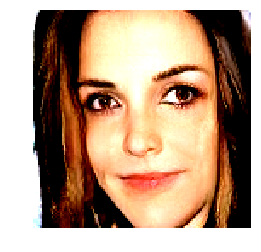

In [13]:
display_image(images[50])

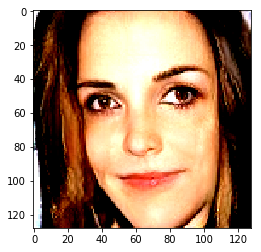

In [15]:
for i in range(2**6-1):
    plt.imshow(images[i])
    plt.savefig("/Users/gexinyue/Documents/curve/TestImage/p_" + str(p) + "_index_" + str(i) + ".jpg")